In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf
import statsmodels.api as sm

import warnings

In [2]:
Assetdata = pd.read_csv("Assetdata.csv").drop(labels=0, axis=0)
Assetdata.index = Assetdata["Date"]
Assetdata = Assetdata.drop("Date", axis =1 ).dropna()
Assetdata


,EUR,GOLD,MXEA,MXEF,SPX,CTA,WTI OIL,Yen JPY,LUATTRUU
Date,,,,,,,,,
30/9/22,0.9802,1660.61,1655.31,873.29,3640.47,3085.709,79.49,144.74,2179.51
29/9/22,0.9815,1660.54,1654.25,875.85,3719.04,3123.491,81.23,144.46,2186.26
28/9/22,0.9735,1659.97,1656.28,891.89,3647.29,3118.111,82.15,144.16,2155.25
27/9/22,0.9594,1628.90,1659.81,888.58,3655.04,3084.866,78.50,144.80,2168.32
26/9/22,0.9609,1622.36,1688.02,905.84,3693.23,3047.655,76.71,144.75,2188.31
...,...,...,...,...,...,...,...,...,...
6/12/00,0.8920,270.00,1467.30,338.08,1402.05,999.759,28.77,110.19,958.71
5/12/00,0.8799,266.35,1462.92,328.09,1389.94,998.242,28.02,111.16,956.22
4/12/00,0.8857,265.85,1442.76,329.31,1387.12,1006.535,28.45,111.12,953.20


In [3]:
Assetdata["number"] = range(len(Assetdata))


In [4]:
Assetdata = Assetdata.sort_values(by=['number'], ascending=False)

Assetdata = Assetdata.drop("number", axis =1 ).dropna()

# Find the Tangency Portfolio of the 10 Assets

In [5]:
Assetdata

,EUR,GOLD,MXEA,MXEF,SPX,CTA,WTI OIL,Yen JPY,LUATTRUU
Date,,,,,,,,,
30/11/00,0.8729,265.85,1454.88,332.62,1411.70,979.352,28.03,110.38,953.47
1/12/00,0.8799,266.55,1449.06,326.36,1416.83,994.708,28.82,111.29,957.56
4/12/00,0.8857,265.85,1442.76,329.31,1387.12,1006.535,28.45,111.12,953.20
5/12/00,0.8799,266.35,1462.92,328.09,1389.94,998.242,28.02,111.16,956.22
6/12/00,0.8920,270.00,1467.30,338.08,1402.05,999.759,28.77,110.19,958.71
...,...,...,...,...,...,...,...,...,...
26/9/22,0.9609,1622.36,1688.02,905.84,3693.23,3047.655,76.71,144.75,2188.31
27/9/22,0.9594,1628.90,1659.81,888.58,3655.04,3084.866,78.50,144.80,2168.32
28/9/22,0.9735,1659.97,1656.28,891.89,3647.29,3118.111,82.15,144.16,2155.25


In [6]:
Assetdata["LUATTRUU"].pct_change().dropna().cumsum()-1

Date
1/12/00   -0.995710
4/12/00   -1.000264
5/12/00   -0.997095
6/12/00   -0.994491
7/12/00   -0.996150
             ...   
26/9/22   -0.144405
27/9/22   -0.153540
28/9/22   -0.159568
29/9/22   -0.145180
30/9/22   -0.148267
Name: LUATTRUU, Length: 5696, dtype: float64

In [7]:
# calculate returns of the assets
AssetReturn = Assetdata.drop("CTA", axis = 1).pct_change().dropna()
AssetReturn = AssetReturn * 100
pd.set_option('display.max_rows', 200)
AssetReturn.head(200)

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,LUATTRUU
Date,,,,,,,,
1/12/00,0.801925,0.263306,-0.400033,-1.882028,0.363392,2.818409,0.824425,0.428959
4/12/00,0.659166,-0.262615,-0.434765,0.903910,-2.096935,-1.283831,-0.152754,-0.455324
5/12/00,-0.654849,0.188076,1.397322,-0.370472,0.203299,-1.511424,0.035997,0.316828
6/12/00,1.375156,1.370377,0.299401,3.044896,0.871261,2.676660,-0.872616,0.260400
7/12/00,-0.392377,-0.148148,1.183807,1.644581,-1.025641,2.294056,0.308558,-0.165848
8/12/00,0.033765,-1.131306,0.016839,-0.320102,0.042517,0.033979,0.461413,-0.456578
11/12/00,-1.181368,1.463140,-0.302373,1.664039,-3.037615,2.751359,-0.225144,-0.102860
12/12/00,0.125242,-0.388242,0.026344,0.976338,0.451679,-0.628099,0.586696,0.482259
13/12/00,-0.272913,0.668151,1.320890,-0.742236,0.630098,-0.033267,0.744795,-0.202852


In [8]:
# calculate mean and standard deviation of returns
meanReturns = AssetReturn.mean()
stdDev = AssetReturn.std()
tableIndex = AssetReturn.columns.to_list()
MeanStdTable = pd.DataFrame(data = meanReturns, index = tableIndex, columns=['Mean'])
MeanStdTable["Standard Deviation"] = stdDev
MeanStdTable

,Mean,Standard Deviation
EUR,0.003740,0.583931
GOLD,0.037839,1.064202
MXEA,0.008252,1.092593
MXEF,0.023804,1.169222
SPX,0.024402,1.245331
WTI OIL,-0.011928,5.131452
Yen JPY,0.006575,0.602879
LUATTRUU,0.014953,0.295844


In [9]:
# calculate the covariance matrix of the eight assets
covMatrix = AssetReturn.cov()
covMatrix

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,LUATTRUU
EUR,0.340975,0.033538,-0.001685,0.020876,-0.005951,-0.026758,-0.106814,0.000516
GOLD,0.033538,1.132525,-0.001953,0.020163,-0.000309,-0.106695,-0.027995,-0.002165
MXEA,-0.001685,-0.001953,1.193760,0.931228,0.014983,-0.064779,-0.040243,0.000987
MXEF,0.020876,0.020163,0.931228,1.367080,-0.016781,0.037982,-0.044670,0.007796
SPX,-0.005951,-0.000309,0.014983,-0.016781,1.550850,-0.072263,0.023613,-0.000246
WTI OIL,-0.026758,-0.106695,-0.064779,0.037982,-0.072263,26.331801,-0.007949,-0.014643
Yen JPY,-0.106814,-0.027995,-0.040243,-0.044670,0.023613,-0.007949,0.363463,-0.000615
LUATTRUU,0.000516,-0.002165,0.000987,0.007796,-0.000246,-0.014643,-0.000615,0.087524


In [10]:
# create a weight matrix
weights = np.array([0.1] * 8)
weights_matrix = np.asmatrix(weights)

# create a column vector of 1
e_matrix = np.array([1] * 8)
e_matrix = np.asmatrix(e_matrix)
e_matrix = e_matrix.T

# create a mean return matrix
meanReturns_matrix = meanReturns.to_numpy()
meanReturns_matrix = np.asmatrix(meanReturns)

# change the covariance dataframe to matrix
cov_matrix = covMatrix.to_numpy()
cov_matrix = np.asmatrix(covMatrix)

# find the inverse of the covariance matrix
inverse_cov_matrix = np.linalg.inv(cov_matrix)

## Calculate Alpha

# $\alpha  = {R}\prime + {V}^{-1}{e} $ 

In [11]:
alpha = meanReturns_matrix * inverse_cov_matrix * e_matrix
alpha = np.asarray(alpha)[0][0]
alpha

0.271752680136248

## Calculate Zeta

# $\zeta={R}\prime{V}^{-1}{R}$

In [12]:
zeta = meanReturns_matrix * inverse_cov_matrix * meanReturns_matrix.T
zeta = np.asarray(zeta)[0][0] 
zeta

0.004909538383300559

## Calculate Delta

# $\delta = {e}\prime{V}^{-1}{e}$

In [13]:
delta = e_matrix.T * inverse_cov_matrix * e_matrix
delta = np.asarray(delta)[0][0] 
delta

22.245118761995222

In [14]:
#Denominator Check 1
denocheck1 = (alpha * meanReturns_matrix -(zeta * e_matrix)) * inverse_cov_matrix * (alpha * meanReturns_matrix - (zeta * e_matrix)).T
denocheck1 = np. asarray(denocheck1)[0][0]
denocheck1

0.00017361966464217928

In [15]:
#Denominator Check 2
denocheck2 = zeta*(zeta*delta-alpha**2)
denocheck2

0.0001736196646421793

In [16]:
Rmv = alpha/delta
Vmv = 1/delta
Stdmv = np.sqrt(Vmv)
cta = Assetdata["CTA"].pct_change().dropna()*100
Rp = cta.mean()
Rp

0.021453921634796376

# Tangency Portfolio Weights (W*)

In [17]:
def minvarfrontier(Rp):
    a = ((zeta * inverse_cov_matrix * e_matrix) - (alpha * inverse_cov_matrix * meanReturns_matrix.T ))/(zeta * delta - alpha**2)
    b = ((delta * inverse_cov_matrix * meanReturns_matrix.T ) - (alpha * inverse_cov_matrix * e_matrix ))/(zeta * delta - alpha**2)
    result = (a + (b * Rp))
    return result

In [18]:
Tangencyweights = minvarfrontier(Rp)
Tangencyweights = np.array(Tangencyweights)
Tangencyweights = pd.DataFrame(data = Tangencyweights, index = tableIndex, columns=['Tangency Weights'])
Tangencyweights

,Tangency Weights
EUR,-0.025117
GOLD,0.171368
MXEA,-0.091441
MXEF,0.140762
SPX,0.076321
WTI OIL,-0.002775
Yen JPY,0.042630
LUATTRUU,0.688252


In [19]:
AssetReturn.head()

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,LUATTRUU
Date,,,,,,,,
1/12/00,0.801925,0.263306,-0.400033,-1.882028,0.363392,2.818409,0.824425,0.428959
4/12/00,0.659166,-0.262615,-0.434765,0.903910,-2.096935,-1.283831,-0.152754,-0.455324
5/12/00,-0.654849,0.188076,1.397322,-0.370472,0.203299,-1.511424,0.035997,0.316828
6/12/00,1.375156,1.370377,0.299401,3.044896,0.871261,2.676660,-0.872616,0.260400
7/12/00,-0.392377,-0.148148,1.183807,1.644581,-1.025641,2.294056,0.308558,-0.165848


In [20]:
AssetReturn["Expected Return"] = np.dot(AssetReturn, Tangencyweights)
AssetReturn

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,LUATTRUU,Expected Return
Date,,,,,,,,,
1/12/00,0.801925,0.263306,-0.400033,-1.882028,0.363392,2.818409,0.824425,0.428959,0.146933
4/12/00,0.659166,-0.262615,-0.434765,0.903910,-2.096935,-1.283831,-0.152754,-0.455324,-0.370936
5/12/00,-0.654849,0.188076,1.397322,-0.370472,0.203299,-1.511424,0.035997,0.316828,0.108059
6/12/00,1.375156,1.370377,0.299401,3.044896,0.871261,2.676660,-0.872616,0.260400,0.802617
7/12/00,-0.392377,-0.148148,1.183807,1.644581,-1.025641,2.294056,0.308558,-0.165848,-0.077922
...,...,...,...,...,...,...,...,...,...
26/9/22,-0.805203,-1.312700,-2.652234,-1.817669,-1.723262,-2.578105,1.004815,-0.022387,-0.315006
27/9/22,-0.156104,0.403116,-1.671189,-1.905414,-1.034054,2.333464,0.034542,-0.913490,-0.755027
28/9/22,1.469669,1.907422,-0.212675,0.372504,-0.212036,4.649682,-0.441989,-0.602771,-0.100946


In [21]:
#Tangency_portfolio_return = AssetReturn["Expected Return"]

In [22]:
#Tangency_portfolio_return.to_csv('Tangency_portfolio_return.csv')

In [23]:
AssetReturn["Cumulative Expected Return"] = np.cumsum(AssetReturn["Expected Return"])-1
AssetReturn

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,LUATTRUU,Expected Return,Cumulative Expected Return
Date,,,,,,,,,,
1/12/00,0.801925,0.263306,-0.400033,-1.882028,0.363392,2.818409,0.824425,0.428959,0.146933,-0.853067
4/12/00,0.659166,-0.262615,-0.434765,0.903910,-2.096935,-1.283831,-0.152754,-0.455324,-0.370936,-1.224003
5/12/00,-0.654849,0.188076,1.397322,-0.370472,0.203299,-1.511424,0.035997,0.316828,0.108059,-1.115943
6/12/00,1.375156,1.370377,0.299401,3.044896,0.871261,2.676660,-0.872616,0.260400,0.802617,-0.313327
7/12/00,-0.392377,-0.148148,1.183807,1.644581,-1.025641,2.294056,0.308558,-0.165848,-0.077922,-0.391249
...,...,...,...,...,...,...,...,...,...,...
26/9/22,-0.805203,-1.312700,-2.652234,-1.817669,-1.723262,-2.578105,1.004815,-0.022387,-0.315006,121.564305
27/9/22,-0.156104,0.403116,-1.671189,-1.905414,-1.034054,2.333464,0.034542,-0.913490,-0.755027,120.809278
28/9/22,1.469669,1.907422,-0.212675,0.372504,-0.212036,4.649682,-0.441989,-0.602771,-0.100946,120.708332


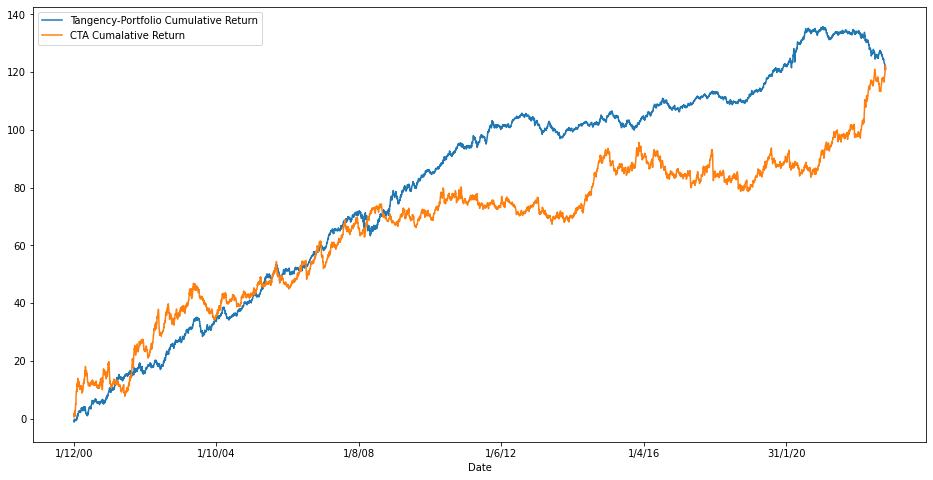

In [24]:
df_plot = pd.DataFrame({"Tangency-Portfolio Cumulative Return": AssetReturn["Cumulative Expected Return"],
                            "CTA Cumalative Return": cta.cumsum()-1},
                           index = cta.index)
    
    #np.cumprod(df_plot + 1).plot(title = "RETURNS of the equal weighted index versus Eigen-portfolio",
                                 #figsize = (16, 8)
                                #)
df_plot.plot(figsize = (16, 8), label = ["Tangency-Portfolio Cumulative Return", "CTA Cumalative Return"])
plt.show()

In [25]:
PredictedAssetdata = pd.read_csv("PredicatedAssetData.csv")
PredictedAssetdata.index = PredictedAssetdata["Date"]
PredictedAssetdata = PredictedAssetdata.drop("Date", axis =1 ).dropna()
PredictedAssetdata

,EUR,GOLD,MXEA,MXEF,SPX,CTA,WTI OIL,Yen JPY,LUATTRUU
Date,,,,,,,,,
14/10/22,0.9722,1644.47,1651.54,854.53,3669.91,3128.333,85.61,148.67,2146.57
13/10/22,0.9776,1666.37,1647.94,865.34,3577.03,3127.180,89.11,147.12,2152.60
12/10/22,0.9703,1673.19,1657.83,864.66,3588.84,3128.704,87.27,146.91,2163.37
11/10/22,0.9708,1666.34,1672.13,884.81,3612.39,3109.501,89.35,145.86,2158.03
10/10/22,0.9702,1668.61,1693.58,897.74,3639.66,3070.843,91.13,145.72,2163.28
7/10/22,0.9744,1694.82,1718.36,910.57,3744.52,3040.985,92.64,145.25,2171.74
6/10/22,0.9791,1712.53,1725.97,909.52,3783.28,3016.150,88.45,145.14,2179.07
5/10/22,0.9884,1716.26,1743.61,893.65,3790.93,3054.559,87.76,144.64,2189.80
4/10/22,0.9986,1726.13,1676.54,876.15,3678.43,3088.627,86.52,144.13,2188.30


In [26]:
PredictedAssetdata["number"] = range(len(PredictedAssetdata))

In [27]:
PredictedAssetdata = PredictedAssetdata.sort_values(by=['number'], ascending=False)

PredictedAssetdata = PredictedAssetdata.drop("number", axis =1 ).dropna()

In [28]:
PredictedAssetdata["LUATTRUU"].pct_change().dropna().cumsum()-1

Date
18/10/22   -0.998254
19/10/22   -1.005413
20/10/22   -1.010798
21/10/22   -1.011000
24/10/22   -1.012319
25/10/22   -1.004166
26/10/22   -1.000121
27/10/22   -0.995211
28/10/22   -0.998971
3/10/22    -0.988074
4/10/22    -0.980894
5/10/22    -0.980209
6/10/22    -0.985109
7/10/22    -0.988472
10/10/22   -0.992368
11/10/22   -0.994795
12/10/22   -0.992320
13/10/22   -0.997299
14/10/22   -1.000100
Name: LUATTRUU, dtype: float64

In [29]:
cta = PredictedAssetdata["CTA"].pct_change().dropna()*100

In [30]:
PredictedAssetReturn = PredictedAssetdata.drop("CTA", axis = 1).pct_change().dropna()
PredictedAssetReturn = PredictedAssetReturn * 100
pd.set_option('display.max_rows', 200)

In [31]:
PredictedAssetReturn

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,LUATTRUU
Date,,,,,,,,
18/10/22,0.172747,0.129084,0.850956,1.536205,1.142756,-3.089165,0.147611,0.174639
19/10/22,-0.862244,-1.378751,-0.820321,-1.497037,-0.667208,3.296305,0.428782,-0.715933
20/10/22,0.133020,-0.087147,0.407345,-0.132808,-0.795094,0.502630,0.166778,-0.538480
21/10/22,0.776620,1.822459,-1.098138,0.032379,2.372483,-1.081647,-1.665002,-0.020243
24/10/22,0.121679,-0.477170,1.698538,-2.575603,1.188195,-0.552616,0.853369,-0.131845
25/10/22,0.931740,0.205482,1.982777,0.207651,1.626665,0.874911,-0.658116,0.815216
26/10/22,1.153923,0.689584,1.498209,0.864407,-0.738771,3.035631,-1.054553,0.404546
27/10/22,-1.160599,-0.075695,-0.363085,0.898088,-0.608260,1.330907,-0.054656,0.490952
28/10/22,0.010036,-1.109234,-0.728817,-1.614968,2.462638,-1.324652,0.895482,-0.375917


In [32]:
PredictedAssetReturn["Expected Return"] = np.dot(PredictedAssetReturn, Tangencyweights)
PredictedAssetReturn

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,LUATTRUU,Expected Return
Date,,,,,,,,,
18/10/22,0.172747,0.129084,0.850956,1.536205,1.142756,-3.089165,0.147611,0.174639,0.378485
19/10/22,-0.862244,-1.378751,-0.820321,-1.497037,-0.667208,3.296305,0.428782,-0.715933,-0.884865
20/10/22,0.133020,-0.087147,0.407345,-0.132808,-0.795094,0.502630,0.166778,-0.538480,-0.499795
21/10/22,0.776620,1.822459,-1.098138,0.032379,2.372483,-1.081647,-1.665002,-0.020243,0.496938
24/10/22,0.121679,-0.477170,1.698538,-2.575603,1.188195,-0.552616,0.853369,-0.131845,-0.564837
25/10/22,0.931740,0.205482,1.982777,0.207651,1.626665,0.874911,-0.658116,0.815216,0.514473
26/10/22,1.153923,0.689584,1.498209,0.864407,-0.738771,3.035631,-1.054553,0.404546,0.242535
27/10/22,-1.160599,-0.075695,-0.363085,0.898088,-0.608260,1.330907,-0.054656,0.490952,0.461249
28/10/22,0.010036,-1.109234,-0.728817,-1.614968,2.462638,-1.324652,0.895482,-0.375917,-0.379947


In [33]:
PredictedAssetReturn["Cumulative Expected Return"] = np.cumsum(PredictedAssetReturn["Expected Return"])-1
PredictedAssetReturn

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,LUATTRUU,Expected Return,Cumulative Expected Return
Date,,,,,,,,,,
18/10/22,0.172747,0.129084,0.850956,1.536205,1.142756,-3.089165,0.147611,0.174639,0.378485,-0.621515
19/10/22,-0.862244,-1.378751,-0.820321,-1.497037,-0.667208,3.296305,0.428782,-0.715933,-0.884865,-1.506379
20/10/22,0.133020,-0.087147,0.407345,-0.132808,-0.795094,0.502630,0.166778,-0.538480,-0.499795,-2.006174
21/10/22,0.776620,1.822459,-1.098138,0.032379,2.372483,-1.081647,-1.665002,-0.020243,0.496938,-1.509236
24/10/22,0.121679,-0.477170,1.698538,-2.575603,1.188195,-0.552616,0.853369,-0.131845,-0.564837,-2.074073
25/10/22,0.931740,0.205482,1.982777,0.207651,1.626665,0.874911,-0.658116,0.815216,0.514473,-1.559600
26/10/22,1.153923,0.689584,1.498209,0.864407,-0.738771,3.035631,-1.054553,0.404546,0.242535,-1.317065
27/10/22,-1.160599,-0.075695,-0.363085,0.898088,-0.608260,1.330907,-0.054656,0.490952,0.461249,-0.855816
28/10/22,0.010036,-1.109234,-0.728817,-1.614968,2.462638,-1.324652,0.895482,-0.375917,-0.379947,-1.235764


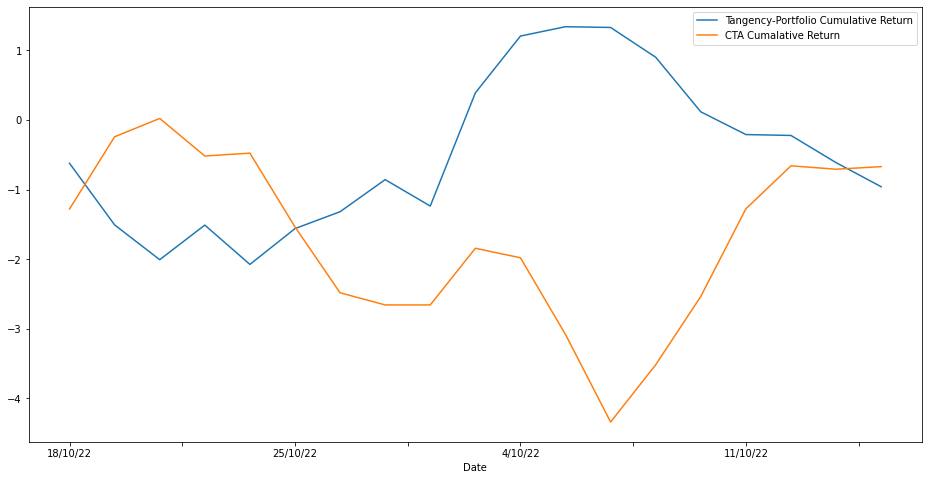

In [34]:
df_plot = pd.DataFrame({"Tangency-Portfolio Cumulative Return": PredictedAssetReturn["Cumulative Expected Return"],
                            "CTA Cumalative Return": cta.cumsum()-1},
                           index = cta.index)
    
    #np.cumprod(df_plot + 1).plot(title = "RETURNS of the equal weighted index versus Eigen-portfolio",
                                 #figsize = (16, 8)
                                #)
df_plot.plot(figsize = (16, 8), label = ["Tangency-Portfolio Cumulative Return", "CTA Cumalative Return"])
plt.show()

# Linear Regression

In [33]:
# define a function to regress on the asset classes
def OLS_mul(y): 
    test = sm.OLS(y, sm.add_constant(AssetReturn[['EUR', 'GOLD', 'MXEA', 'MXEF', 'SPX', 'WTI OIL', 'Yen JPY', 'LUATTRUU']])).fit() 
    print(test.summary()) 
    return test.params.tolist()

In [37]:
OLS_mul(cta)

                            OLS Regression Results                            
Dep. Variable:                    CTA   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.494
Date:                Sat, 29 Oct 2022   Prob (F-statistic):             0.0106
Time:                        13:25:11   Log-Likelihood:                -4254.7
No. Observations:                5706   AIC:                             8527.
Df Residuals:                    5697   BIC:                             8587.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0216      0.007      3.194      0.0

[0.021635469431520303,
 0.016177379698494268,
 0.0031628628020431235,
 -0.02957585835286423,
 0.009715042204445952,
 -0.005619249898265434,
 -0.0006289893665004543,
 -0.012619688527944218,
 0.005836439240414923]

In [40]:
y = cta
x = AssetReturn[['EUR', 'GOLD', 'MXEA', 'MXEF', 'SPX', 'WTI OIL', 'Yen JPY', 'LUATTRUU']]

In [87]:
test = sm.OLS(y[:50], x[:50]).fit() 
test.params

EUR         0.212041
GOLD       -0.202494
MXEA        0.112854
MXEF       -0.084698
SPX         0.022031
WTI OIL    -0.040126
Yen JPY     0.040198
LUATTRUU    0.185794
dtype: float64

In [115]:
np.arange(0,5700,5)

array([   0,    5,   10, ..., 5685, 5690, 5695])

In [122]:
def olsrolling5(p,x,y):
    rsq = []
    W = []
    for i in np.arange(0,5700,5):
        test = sm.OLS(y[i:i+p], x[i:i+p]).fit() 
        rsq.append(test.rsquared)
        W.append(test.params)
    return rsq

In [123]:
R = pd.DataFrame()
R["10 days"] = olsrolling5(10,x,y)
R.describe()

,10 days
count,1140.000000
mean,0.798443
std,0.161113
min,0.204727
25%,0.703845
50%,0.836504
75%,0.926512
max,0.999903


In [124]:
def olsrolling520(p,x,y):
    rsq = []
    W = []
    for i in np.arange(0,5690,5):
        test = sm.OLS(y[i:i+p], x[i:i+p]).fit() 
        rsq.append(test.rsquared)
        W.append(test.params)
    return rsq

In [125]:
R = pd.DataFrame()
R["20 days"] = olsrolling520(20,x,y)
R.describe()

,20 days
count,1138.000000
mean,0.426675
std,0.155390
min,0.038080
25%,0.311563
50%,0.422062
75%,0.535683
max,0.894975


In [128]:
def olsrolling5(p,x,y):
    rsq = []
    W = []
    for i in np.arange(0,(5700-p),5):
        test = sm.OLS(y[i:i+p], x[i:i+p]).fit() 
        rsq.append(test.rsquared)
        W.append(test.params)
    return rsq

In [129]:
R = pd.DataFrame()
R["60 days"] = olsrolling5(60,x,y)
R.describe()

,60 days
count,1128.000000
mean,0.177808
std,0.086430
min,0.018731
25%,0.115252
50%,0.167348
75%,0.222400
max,0.575743


In [130]:
R = pd.DataFrame()
R["120 days"] = olsrolling5(120,x,y)
R.describe()

,120 days
count,1116.000000
mean,0.109493
std,0.064023
min,0.005274
25%,0.063179
50%,0.097823
75%,0.142745
max,0.354308


In [131]:
R = pd.DataFrame()
R["250 days"] = olsrolling5(250,x,y)
R.describe()

,250 days
count,1090.000000
mean,0.062773
std,0.041854
min,0.006581
25%,0.030354
50%,0.051000
75%,0.085805
max,0.208431


In [88]:
# period = p, slicing the dataset between i and i+p

def olsrolling(p,x,y):
    rsq = []
    W = []
    for i in range(len(x)-p):
        test = sm.OLS(y[i:i+p], x[i:i+p]).fit() 
        rsq.append(test.rsquared)
        W.append(test.params)
    return rsq

In [106]:
R = pd.DataFrame()
R["10 days"] = olsrolling(10,x,y)
R.describe()

,10 days
count,5696.000000
mean,0.798187
std,0.163682
min,0.132721
25%,0.701032
50%,0.838613
75%,0.930619
max,0.999976


In [107]:
R = pd.DataFrame()
R["20 days"] = olsrolling(20,x,y)
R.describe()

,20 days
count,5686.000000
mean,0.425904
std,0.155098
min,0.038080
25%,0.311783
50%,0.419967
75%,0.531769
max,0.894975


In [108]:
R = pd.DataFrame()
R["60 days"] = olsrolling(60,x,y)
R.describe()

,60 days
count,5646.000000
mean,0.178498
std,0.086986
min,0.017788
25%,0.113691
50%,0.169088
75%,0.224739
max,0.577680


In [109]:
R = pd.DataFrame()
R["120 days"] = olsrolling(120,x,y)
R.describe()

,120 days
count,5586.000000
mean,0.109734
std,0.064045
min,0.005274
25%,0.063187
50%,0.097971
75%,0.142788
max,0.368664


In [110]:
R = pd.DataFrame()
R["250 days"] = olsrolling(250,x,y)
R.describe()

,250 days
count,5456.000000
mean,0.062744
std,0.041783
min,0.005961
25%,0.030342
50%,0.051114
75%,0.085916
max,0.211415
